<a href="https://colab.research.google.com/github/bikash-bhoi/eva4/blob/master/Session15_Final/EVA4_Session15_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from glob import glob
import re
import os, cv2
from fnmatch import fnmatch
import shutil
import numpy as np
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import torch
torch.cuda.get_device_name()

'Tesla P100-PCIE-16GB'

In [4]:

%%bash
unzip -d /content/Data /content/drive/My\ Drive/RCNN/fg_bg.zip
unzip -d /content/Data /content/drive/My\ Drive/RCNN/Depth_output.zip

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
!mkdir /content/Data/Mask_RCNN/Depth_output
source = '/content/Data/content/Mask_RCNN/Depth_output/'
dest1 = '/content/Data/Mask_RCNN/Depth_output/'

files = os.listdir(source)

for f in tqdm(files):
    shutil.move(source+f, dest1)

100%|██████████| 424320/424320 [00:15<00:00, 27107.54it/s]


In [0]:
!cp /content/drive/My\ Drive/RCNN/test*.csv  /content/Data/Mask_RCNN
!cp /content/drive/My\ Drive/RCNN/train.csv  /content/Data/Mask_RCNN
!mkdir Dense_Depth
!cp -r /content/drive/My\ Drive/Dense_Depth/*  /content/Dense_Depth/
!cp /content/drive/My\ Drive/RCNN/model_resnet Dense_Depth/pretrained_model/model_resnet
!cp /content/drive/My\ Drive/mask_save Dense_Depth/pretrained_model/mask_save

In [7]:
len(os.listdir('/content/Data/Mask_RCNN/fg_bg')),len(os.listdir('/content/Data/Mask_RCNN/Depth_output'))


(424320, 424320)

In [0]:
!cd Dense_Depth; python train.py --epochs 5

In [0]:
!cp /content/drive/My\ Drive/mask_save Dense_Depth/pretrained_model/mask_save
!cd Dense_Depth; python test.py --epochs 1

test.py:88: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = torch.autograd.Variable(image, volatile=True).cuda()
test.py:89: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  depth_ = torch.autograd.Variable(depth_, volatile=True).cuda(async=True)
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of cuda is deprecated:
	cuda(torch.device device, bool async, *, torch.memory_format memory_format)
Consider using one of the following signatures instead:
	cuda(torch.device device, bool non_blocking, *, torch.memory_format memory_format)
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarn

In [0]:
!cd Dense_Depth; python train.py --start-epoch 5 --epochs 10

Streaming output truncated to the last 5000 lines.
Epoch: [6][309/1326]	Time 1.801 (561.042)	Loss 0.0031 (0.0031)
Epoch: [6][310/1326]	Time 1.803 (562.845)	Loss 0.0031 (0.0031)
Epoch: [6][311/1326]	Time 1.802 (564.647)	Loss 0.0031 (0.0031)
Epoch: [6][312/1326]	Time 1.801 (566.448)	Loss 0.0033 (0.0031)
Epoch: [6][313/1326]	Time 1.807 (568.254)	Loss 0.0030 (0.0031)
Epoch: [6][314/1326]	Time 1.801 (570.056)	Loss 0.0031 (0.0031)
Epoch: [6][315/1326]	Time 1.801 (571.857)	Loss 0.0030 (0.0031)
Epoch: [6][316/1326]	Time 1.802 (573.660)	Loss 0.0030 (0.0031)
Epoch: [6][317/1326]	Time 1.802 (575.461)	Loss 0.0030 (0.0031)
Epoch: [6][318/1326]	Time 1.800 (577.261)	Loss 0.0031 (0.0031)
Epoch: [6][319/1326]	Time 1.801 (579.062)	Loss 0.0031 (0.0031)
Epoch: [6][320/1326]	Time 1.802 (580.864)	Loss 0.0031 (0.0031)
Epoch: [6][321/1326]	Time 1.802 (582.666)	Loss 0.0030 (0.0031)
Epoch: [6][322/1326]	Time 1.801 (584.467)	Loss 0.0030 (0.0031)
Epoch: [6][323/1326]	Time 1.802 (586.269)	Loss 0.0030 (0.0031)
Epoc

In [0]:
!cp /content/drive/My\ Drive/mask_save Dense_Depth/pretrained_model/
!cd Dense_Depth; python test.py --epochs 1

test.py:88: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = torch.autograd.Variable(image, volatile=True).cuda()
test.py:89: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  depth_ = torch.autograd.Variable(depth_, volatile=True).cuda(async=True)
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of cuda is deprecated:
	cuda(torch.device device, bool async, *, torch.memory_format memory_format)
Consider using one of the following signatures instead:
	cuda(torch.device device, bool non_blocking, *, torch.memory_format memory_format)
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarn

In [0]:
!cd Dense_Depth; python train.py --start-epoch 12 --epochs 15

True
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
Epoch: [12][0/1326]	Time 19.972 (19.972)	Loss 0.0035 (0.0035)
Epoch: [12][1/1326]	Time 3.244 (23.216)	Loss 0.0036 (0.0036)
Epoch: [12][2/1326]	Time 3.184 

In [9]:
!cp /content/drive/My\ Drive/mask_save Dense_Depth/pretrained_model/
!cd Dense_Depth; python test.py --epochs 1

test.py:88: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = torch.autograd.Variable(image, volatile=True).cuda()
test.py:89: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  depth_ = torch.autograd.Variable(depth_, volatile=True).cuda(async=True)
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of cuda is deprecated:
	cuda(torch.device device, bool async, *, torch.memory_format memory_format)
Consider using one of the following signatures instead:
	cuda(torch.device device, bool non_blocking, *, torch.memory_format memory_format)
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarn

In [10]:
!cd Dense_Depth; python train.py --start-epoch 15 --epochs 20

Streaming output truncated to the last 5000 lines.
Epoch: [16][309/1326]	Time 1.801 (560.220)	Loss 0.0037 (0.0037)
Epoch: [16][310/1326]	Time 1.799 (562.020)	Loss 0.0037 (0.0037)
Epoch: [16][311/1326]	Time 1.801 (563.820)	Loss 0.0037 (0.0037)
Epoch: [16][312/1326]	Time 1.800 (565.620)	Loss 0.0037 (0.0037)
Epoch: [16][313/1326]	Time 1.801 (567.420)	Loss 0.0038 (0.0037)
Epoch: [16][314/1326]	Time 1.800 (569.221)	Loss 0.0038 (0.0037)
Epoch: [16][315/1326]	Time 1.801 (571.022)	Loss 0.0038 (0.0037)
Epoch: [16][316/1326]	Time 1.800 (572.822)	Loss 0.0038 (0.0037)
Epoch: [16][317/1326]	Time 1.802 (574.624)	Loss 0.0037 (0.0037)
Epoch: [16][318/1326]	Time 1.801 (576.426)	Loss 0.0037 (0.0037)
Epoch: [16][319/1326]	Time 1.801 (578.227)	Loss 0.0037 (0.0037)
Epoch: [16][320/1326]	Time 1.801 (580.028)	Loss 0.0036 (0.0037)
Epoch: [16][321/1326]	Time 1.801 (581.829)	Loss 0.0038 (0.0037)
Epoch: [16][322/1326]	Time 1.800 (583.629)	Loss 0.0037 (0.0037)
Epoch: [16][323/1326]	Time 1.802 (585.431)	Loss 0.003

In [11]:
!cp /content/drive/My\ Drive/mask_save Dense_Depth/pretrained_model/
!cd Dense_Depth; python test.py --epochs 1

test.py:88: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = torch.autograd.Variable(image, volatile=True).cuda()
test.py:89: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  depth_ = torch.autograd.Variable(depth_, volatile=True).cuda(async=True)
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of cuda is deprecated:
	cuda(torch.device device, bool async, *, torch.memory_format memory_format)
Consider using one of the following signatures instead:
	cuda(torch.device device, bool non_blocking, *, torch.memory_format memory_format)
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarn

5 (32, 32)


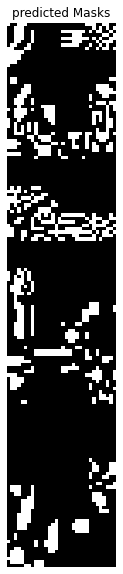

In [2]:
os.chdir('/content')
from Dense_Depth import util
depth_dir='/content/Dense_Depth/output_depth/'
mask_dir='/content/Dense_Depth/output_mask/'
fg_bg_dir='/content/Data/Mask_RCNN/fg_bg/'
util.disp_images(mask_dir,'predicted Masks',True)
#disp_images(depth_dir,'predicted depths')